In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import os
import PIL
import numpy as np
from numpy import genfromtxt



In [2]:
conda install tensorflow=2.8.0


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# import h5py
# import keras
# import tensorflow as tf
# h5py.__version__
# keras.__version__
# tf.__version__
# !python3 --version

In [4]:
from tensorflow.keras.models import model_from_json

json_file = open('./keras-facenet-h5/model.json', 'r', encoding='utf-8-sig')
loaded_model_json = json_file.read()
json_file.close()
print(len(loaded_model_json))
model = model_from_json(loaded_model_json)
# model.load_weights('keras-facenet-h5/model.h5')

236644


2022-08-10 13:07:09.775468: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [7]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                

 on)                                                                                              
                                                                                                  
 Block35_1_Branch_1_Conv2d_0a_1  (None, 17, 17, 32)  0           ['Block35_1_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_2_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_1_Branch_2_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_0_Conv2d_1x1   (None, 17, 17, 32)  8192        ['Conv2d_4b_3x3_Activation[0][0]'
 (Conv2D)                                                        ]                                
          

 (Conv2D)                                                                                         
                                                                                                  
 Block35_2_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_1_Conv2d_0a_1x
 x3 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block35_2_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_2_Conv2d_0b_3x
 x3 (Conv2D)                                                     3_Activation[0][0]']             
                                                                                                  
 Block35_2_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  96          ['Block35_2_Branch_0_Conv2d_1x1[0
 BatchNorm (BatchNormalization)                                  ][0]']                           
          

 BatchNorm (BatchNormalization)                                  ][0]']                           
                                                                                                  
 Block35_3_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  96          ['Block35_3_Branch_1_Conv2d_0b_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_3_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  96          ['Block35_3_Branch_2_Conv2d_0c_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_3

                                                                                                  
 Block35_4_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  0           ['Block35_4_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block35_4_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_4_Branch_1_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_4_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  0           ['Block35_4_Branch_2_Conv2d_0c_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_4

                                                                                                  
 Block35_5_Concatenate (Concate  (None, 17, 17, 96)  0           ['Block35_5_Branch_0_Conv2d_1x1_A
 nate)                                                           ctivation[0][0]',                
                                                                  'Block35_5_Branch_1_Conv2d_0b_3x
                                                                 3_Activation[0][0]',             
                                                                  'Block35_5_Branch_2_Conv2d_0c_3x
                                                                 3_Activation[0][0]']             
                                                                                                  
 Block35_5_Conv2d_1x1 (Conv2D)  (None, 17, 17, 256)  24832       ['Block35_5_Concatenate[0][0]']  
                                                                                                  
 Block35_5

 Block17_1_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_1_Branch_1_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_1_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Mixed_6a[0][0]']               
 (Conv2D)                                                                                         
                                                                                                  
 Block17_1_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   114688      ['Block17_1_Branch_1_Conv2d_0b_1x
 x1 (Conv2D)                                                     7_Activation[0][0]']             
                                                                                                  
 Block17_1_Branch_0_Conv2d_1x1_  (None, 8, 8, 128)   384         ['Block17_1_Branch_0_Conv2d_1x1[0
 BatchNorm

                                                                                                  
 Block17_2_Activation (Activati  (None, 8, 8, 896)   0           ['Block17_2_ScaleSum[0][0]']     
 on)                                                                                              
                                                                                                  
 Block17_3_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   114688      ['Block17_2_Activation[0][0]']   
 x1 (Conv2D)                                                                                      
                                                                                                  
 Block17_3_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   384         ['Block17_3_Branch_1_Conv2d_0a_1x
 x1_BatchNorm (BatchNormalizati                                  1[0][0]']                        
 on)                                                                                              
          

 BatchNorm (BatchNormalization)                                  ][0]']                           
                                                                                                  
 Block17_4_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   384         ['Block17_4_Branch_1_Conv2d_0c_7x
 x1_BatchNorm (BatchNormalizati                                  1[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block17_4_Branch_0_Conv2d_1x1_  (None, 8, 8, 128)   0           ['Block17_4_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block17_4_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   0           ['Block17_4_Branch_1_Conv2d_0c_7x
 x1_Activa

                                                                                                  
 Block17_6_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   0           ['Block17_6_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_6_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   114688      ['Block17_6_Branch_1_Conv2d_0a_1x
 x7 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block17_6_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   384         ['Block17_6_Branch_1_Conv2d_0b_1x
 x7_BatchNorm (BatchNormalizati                                  7[0][0]']                        
 on)                                                                                              
          

 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_7_Concatenate (Concate  (None, 8, 8, 256)   0           ['Block17_7_Branch_0_Conv2d_1x1_A
 nate)                                                           ctivation[0][0]',                
                                                                  'Block17_7_Branch_1_Conv2d_0c_7x
                                                                 1_Activation[0][0]']             
                                                                                                  
 Block17_7_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_7_Concatenate[0][0]']  
                                                                                                  
 Block17_7_ScaleSum (Lambda)    (None, 8, 8, 896)    0           ['Block17_6_Activation[0][0]',   
          

                                                                                                  
 Block17_9_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_9_Branch_1_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_9_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Block17_8_Activation[0][0]']   
 (Conv2D)                                                                                         
                                                                                                  
 Block17_9_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   114688      ['Block17_9_Branch_1_Conv2d_0b_1x
 x1 (Conv2D)                                                     7_Activation[0][0]']             
                                                                                                  
 Block17_9

 Block17_10_ScaleSum (Lambda)   (None, 8, 8, 896)    0           ['Block17_9_Activation[0][0]',   
                                                                  'Block17_10_Conv2d_1x1[0][0]']  
                                                                                                  
 Block17_10_Activation (Activat  (None, 8, 8, 896)   0           ['Block17_10_ScaleSum[0][0]']    
 ion)                                                                                             
                                                                                                  
 Mixed_7a_Branch_2_Conv2d_0a_1x  (None, 8, 8, 256)   229376      ['Block17_10_Activation[0][0]']  
 1 (Conv2D)                                                                                       
                                                                                                  
 Mixed_7a_Branch_2_Conv2d_0a_1x  (None, 8, 8, 256)   768         ['Mixed_7a_Branch_2_Conv2d_0a_1x1
 1_BatchNo

                                                                  'Mixed_7a_Branch_2_Conv2d_1a_3x3
                                                                 _Activation[0][0]',              
                                                                  'Mixed_7a_Branch_3_MaxPool_1a_3x
                                                                 3[0][0]']                        
                                                                                                  
 Block8_1_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   344064      ['Mixed_7a[0][0]']               
 1 (Conv2D)                                                                                       
                                                                                                  
 Block8_1_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   576         ['Block8_1_Branch_1_Conv2d_0a_1x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)       

 Block8_2_Branch_0_Conv2d_1x1_B  (None, 3, 3, 192)   576         ['Block8_2_Branch_0_Conv2d_1x1[0]
 atchNorm (BatchNormalization)                                   [0]']                            
                                                                                                  
 Block8_2_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   576         ['Block8_2_Branch_1_Conv2d_0c_3x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_2_Branch_0_Conv2d_1x1_A  (None, 3, 3, 192)   0           ['Block8_2_Branch_0_Conv2d_1x1_Ba
 ctivation (Activation)                                          tchNorm[0][0]']                  
                                                                                                  
 Block8_2_

 n)                                                                                               
                                                                                                  
 Block8_4_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   0           ['Block8_4_Branch_1_Conv2d_0a_1x1
 1_Activation (Activation)                                       _BatchNorm[0][0]']               
                                                                                                  
 Block8_4_Branch_1_Conv2d_0b_1x  (None, 3, 3, 192)   110592      ['Block8_4_Branch_1_Conv2d_0a_1x1
 3 (Conv2D)                                                      _Activation[0][0]']              
                                                                                                  
 Block8_4_Branch_1_Conv2d_0b_1x  (None, 3, 3, 192)   576         ['Block8_4_Branch_1_Conv2d_0b_1x3
 3_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)       

 Block8_5_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   0           ['Block8_5_Branch_1_Conv2d_0c_3x1
 1_Activation (Activation)                                       _BatchNorm[0][0]']               
                                                                                                  
 Block8_5_Concatenate (Concaten  (None, 3, 3, 384)   0           ['Block8_5_Branch_0_Conv2d_1x1_Ac
 ate)                                                            tivation[0][0]',                 
                                                                  'Block8_5_Branch_1_Conv2d_0c_3x1
                                                                 _Activation[0][0]']              
                                                                                                  
 Block8_5_Conv2d_1x1 (Conv2D)   (None, 3, 3, 1792)   689920      ['Block8_5_Concatenate[0][0]']   
                                                                                                  
 Block8_5_

In [8]:
def triplet_loss(y_true, y_pred, alpha=0.2):

  anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
  pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
  neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1) 
  basic_loss = tf.maximum(tf.add(tf.subtract(pos_dist, neg_dist), alpha), 0)
  loss = tf.reduce_sum(basic_loss)
  return loss

In [9]:
tf.random.set_seed(1)
y_true = (None, None, None) # It is not used
y_pred = (tf.keras.backend.random_normal([3, 128], mean=6, stddev=0.1, seed = 1),
          tf.keras.backend.random_normal([3, 128], mean=1, stddev=1, seed = 1),
          tf.keras.backend.random_normal([3, 128], mean=3, stddev=4, seed = 1))
loss = triplet_loss(y_true, y_pred)
print("loss = " + str(loss))

loss = tf.Tensor(527.2598, shape=(), dtype=float32)


In [10]:
FRmodel = model
# np.around([.5, 1.5, 2.5, 3.5, 4.5]) # rounds to nearest even value


In [11]:
def img_to_encoding(image_path, model):
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
  img = np.around(np.array(img)/255.0, decimals=12)
  x_train = np.expand_dims(img, axis=0)
  embedding = model.predict(x_train)
  return embedding/np.linalg.norm(embedding)

# predict_on_batch is a lightweight alternative to predict that should be used on a single batch

In [12]:
import numpy
numpy.around(12.563, decimals=3)
img_to_encoding("../images/danielle.png", FRmodel)


array([[ 0.12573628, -0.00548391, -0.07986397,  0.06883868,  0.04335459,
         0.04981745, -0.13635767,  0.03789787,  0.01976818,  0.22778733,
        -0.1352545 ,  0.06242565, -0.00228046, -0.10042624,  0.03573518,
         0.00539919, -0.04099378,  0.09913933,  0.06534543,  0.10635084,
         0.01786944, -0.10533545,  0.09812514,  0.04616202, -0.04405133,
        -0.00226864, -0.04294416,  0.17051087,  0.03128363,  0.08611088,
        -0.03826094, -0.04557959,  0.0124454 ,  0.14488642, -0.05104939,
        -0.00674383,  0.0797243 ,  0.03225582, -0.09801611, -0.00622282,
         0.04038478, -0.05891296, -0.07199308,  0.08449957, -0.05010245,
         0.07040136, -0.01139629, -0.02844289,  0.04896803, -0.02218243,
        -0.11829244,  0.01497208, -0.01757445, -0.07505194, -0.06627035,
         0.02176401, -0.21230865,  0.08427149, -0.0056523 ,  0.00431519,
        -0.03049551, -0.07977822,  0.07974892,  0.11289688,  0.08655985,
        -0.05002967,  0.082914  , -0.0265881 ,  0.1

In [13]:
c = np.array([[ 0, 4, 0],
              [0, 3, 0]])

c2 = np.linalg.norm(c, ord=1)
c2

7.0

In [14]:
!unzip /content/drive/MyDrive/Face_net/images.zip

unzip:  cannot find or open /content/drive/MyDrive/Face_net/images.zip, /content/drive/MyDrive/Face_net/images.zip.zip or /content/drive/MyDrive/Face_net/images.zip.ZIP.


In [20]:
database = {}
database["danielle"] = img_to_encoding("../images/danielle.png", FRmodel)
database["younes"] = img_to_encoding("../images/younes.jpg", FRmodel)
database["tian"] = img_to_encoding("../images/tian.jpg", FRmodel)
database["andrew"] = img_to_encoding("../images/andrew.jpg", FRmodel)
database["kian"] = img_to_encoding("../images/kian.jpg", FRmodel)
database["dan"] = img_to_encoding("../images/dan.jpg", FRmodel)
database["sebastiano"] = img_to_encoding("../images/sebastiano.jpg", FRmodel)
database["bertrand"] = img_to_encoding("../images/bertrand.jpg", FRmodel)
database["kevin"] = img_to_encoding("../images/kevin.jpg", FRmodel)
database["felix"] = img_to_encoding("../images/felix.jpg", FRmodel)
database["benoit"] = img_to_encoding("../images/benoit.jpg", FRmodel)
database["arnaud"] = img_to_encoding("../images/arnaud.jpg", FRmodel)

In [21]:
danielle = tf.keras.preprocessing.image.load_img('../images/danielle.png', target_size=(160, 160))
kian = tf.keras.preprocessing.image.load_img("../images/kian.jpg", target_size=(160, 160))
benoit = tf.keras.preprocessing.image.load_img("../images/benoit.jpg")
np.array(benoit).shape

(96, 96, 3)

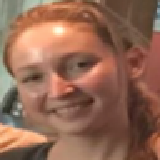

In [23]:
danielle

In [24]:
np.around(np.array(benoit) / 255.0, decimals=12).shape

(96, 96, 3)

In [25]:
def verify(image_path, identity, database, model):

  encoding = img_to_encoding(image_path, model)
  dist = np.linalg.norm(encoding - database[identity])

  if dist < 0.7:
    print("It's " + str(identity) + ", welcome in!")
    door_open = True
  else:
    print("It's not " + str(identity) + ", please go away")
    door_open = False


  return dist, door_open

In [26]:
verify("../images/camera_0.jpg", "younes", database, FRmodel)

It's younes, welcome in!


(0.08290728, True)

In [29]:
verify("../images/camera_2.jpg", "kian", database, FRmodel)

It's kian, welcome in!


(0.12880978, True)

In [30]:
verify("../images/andrew.jpg", "andrew", database, FRmodel)

It's andrew, welcome in!


(0.0, True)

In [31]:
def who_is_it(image_path, database, model):

  encoding = img_to_encoding(image_path, model)
  min_dist = 100
  for (name, db_enc) in database.items():
    dist = np.linalg.norm(encoding - db_enc)

    if dist < min_dist:
      min_dist = dist
      identity = name

  if min_dist > 0.7:
    print('Not in the database!')
  else:
    print ("it's " + str(identity) + ", welcome!")

  return identity, min_dist

In [32]:
who_is_it("../images/camera_0.jpg", database, FRmodel)

it's younes, welcome!


('younes', 0.08290728)